## Name - Shrutee Sanjay Kadage


## Student id - 48126268

## Portfolio 4 

## Navigating Insights: Analyzing Ferry Usage Patterns in Sydney for Informed Decision-Making

This study investigates the factors influencing ferry usage patterns and explores the feasibility of predicting future ferry usage based on historical data. Utilizing a dataset containing ferry trip records, I employed exploratory data analysis techniques to identify key factors influencing trip counts, including route, card type, and time. Correlation analysis and visualization techniques such as bar charts and box plots are employed to analyze the relationships between these variables and trip counts. Furthermore, predictive modeling using linear regression is utilized to forecast future ferry usage, with model performance evaluated using mean squared error. The findings of this study provide valuable insights for stakeholders in ferry operations and management, aiding in informed decision-making processes.

## Purposes of the Analysis is to find answers of following questions:
1) What are the key factors influencing ferry usage patterns? 

2) How do different variables such as route, card type influence the number of trips?

3) Can we predict future ferry usage based on historical data?

## Let's break down the proposed analysis into detailed steps :
1) Data Preparation and Exploration

2) Analysis/Prediction Techniques

3) Visualization of Data or Performance Evaluation Results

In [13]:
# 1) Data Preparation and Exploration
# Load Dataset: Load the ferry dataset into a pandas DataFrame.
# Importing necessary library pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:

# Load the dataset and reading the data using read_csv
ferry_data = pd.read_csv("files/ferry_data.csv")

In [15]:
# Exploring dataset
# .head() shows first 5 rows of dataset
ferry_data.head()

,Year_Month,Route,Card_type,Trip
0,2016-07,118 Newcastle,Adult,18047
1,2016-07,118 Newcastle,Child/Youth,1500
2,2016-07,118 Newcastle,Concession,5659
3,2016-07,118 Newcastle,Employee,407
4,2016-07,118 Newcastle,Free Travel,193


In [16]:
# .shape shows (no. of columns,no.of rows)
ferry_data.shape

(8708, 4)

In [17]:
# .describe gives overall description
ferry_data.describe

<bound method NDFrame.describe of      Year_Month           Route                   Card_type   Trip
0       2016-07   118 Newcastle                       Adult  18047
1       2016-07   118 Newcastle                 Child/Youth   1500
2       2016-07   118 Newcastle                  Concession   5659
3       2016-07   118 Newcastle                    Employee    407
4       2016-07   118 Newcastle                 Free Travel    193
...         ...             ...                         ...    ...
8703    2024-04  F9 Watsons Bay                 Free Travel    128
8704    2024-04  F9 Watsons Bay              School Student    300
8705    2024-04  F9 Watsons Bay            Senior/Pensioner  18396
8706    2024-04  F9 Watsons Bay        Sgl Trip Ferry Adult   2009
8707    2024-04  F9 Watsons Bay  Sgl Trip Ferry Child/Youth   1238

[8708 rows x 4 columns]>

In [18]:
# display() shows all the dataset
display(ferry_data)

,Year_Month,Route,Card_type,Trip
0,2016-07,118 Newcastle,Adult,18047
1,2016-07,118 Newcastle,Child/Youth,1500
2,2016-07,118 Newcastle,Concession,5659
3,2016-07,118 Newcastle,Employee,407
4,2016-07,118 Newcastle,Free Travel,193
...,...,...,...,...
8703,2024-04,F9 Watsons Bay,Free Travel,128
8704,2024-04,F9 Watsons Bay,School Student,300
8705,2024-04,F9 Watsons Bay,Senior/Pensioner,18396
8706,2024-04,F9 Watsons Bay,Sgl Trip Ferry Adult,2009


In [19]:
# Cleaning the dataset
# Missing Value Treatment: Check for missing values and handle them by imputation or removal.
# Counting the number of missing data in each column and printing the same

ferry_data_1 = ferry_data.isnull().sum()
print (ferry_data_1)

Year_Month    0
Route         0
Card_type     0
Trip          0
dtype: int64


Here ,there is no null value in dataset.No need to clean.So, this the perfect dataset.

In [20]:
# Variable Identification: Check the columns in the dataset to identify the variables.
print(ferry_data.columns)

Index(['Year_Month', 'Route', 'Card_type', 'Trip'], dtype='object')


In [22]:
# Univariate Analysis: Calculating summary statistics for numerical variables like "Trip" and plot histograms to visualize their distributions.
# Summary statistics
trip_stats = data["Trip"].describe()
print(trip_stats)


count      8708.000000
mean      11493.970717
std       32581.759421
min           1.000000
25%         226.000000
50%        1215.500000
75%        8375.250000
max      437077.000000
Name: Trip, dtype: float64


This shows calculation of summary statistics (mean, standard deviation, minimum, maximum, quartiles) for the numerical variable "Trip" in the dataset. It stores the summary statistics in the variable "trip_stats".

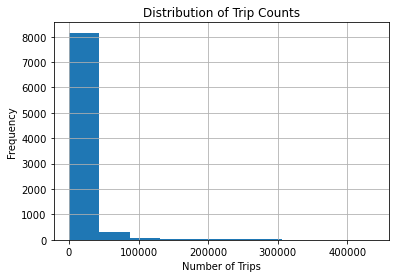

In [23]:
# Histogram - Distribution of trips
data["Trip"].hist()
plt.xlabel("Number of Trips")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Counts")
plt.show()

 The histogram provides a visual summary of the distribution of trip counts, allowing for quick insights into the frequency and range of trip counts observed in the dataset. It helps identify any patterns, outliers, or trends in the distribution of trip counts, which can inform further analysis or decision-making processes.

In [30]:
# Bi-variate Analysis: Explore relationships between variables using correlation analysis or cross-tabulations

# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)


      Trip
Trip   1.0


The correlation matrix provides a numerical representation of the correlation between different numerical variables in the dataset. In this case, it shows the correlation coefficients between all pairs of numerical variables. Since "Trip" is the only numerical variable in the dataset, the correlation coefficient for "Trip" with itself (i.e., correlation of "Trip" with "Trip") is 1.0, indicating a perfect correlation.

In [31]:
# Cross-tabulation
cross_tab = pd.crosstab(data["Route"], data["Card_type"])
print(cross_tab)

Card_type            Adult  CTP  Child/Youth  Concession  \
Route                                                      
118 Newcastle           94   52           94          94   
F1 Manly                94   82           94          94   
F2 Taronga Zoo          94   74           94          94   
F3 Parramatta River     94   75           94          94   
F4 Cross Harbour        36   33           36          36   
F4 Darling Harbour      17    0           17          17   
F4 Pyrmont Bay          43   43           43          43   
F5 Neutral Bay          94   74           94          94   
F6 Mosman Bay           94   74           94          94   
F7 Double Bay           78   74           78          78   
F7 Eastern Suburbs      17    0           17          17   
F8 Cockatoo Island      78   74           78          78   
F9 Watsons Bay          43   43           43          43   

Card_type            Day Pass Child/Youth w/o SAF  Day Pass without SAF  \
Route                   

The cross-tabulation provides a tabular summary of the frequency distribution of two categorical variables: "Route" and "Card_type". Each cell in the table represents the count of observations corresponding to a particular combination of route and card type. For example, the cell at row "118 Newcastle" and column "Adult" shows that there are 94 observations where the route is "118 Newcastle" and the card type is "Adult". Similarly, other cells in the table display the frequency counts for different combinations of routes and card types.

In [41]:
# Analysis/Prediction Techniques: 
#Linear Regression:Fit a linear regression model to predict the number of trips based on selected features.

# One-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=["Route", "Card_type"], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 620385759.280765


Here ,the mse is very large .So, I am trying to reduce it by using different features and technique.

In [42]:
from sklearn.linear_model import Ridge

# Define features and target variable
X = data[["Route", "Card_type"]]  # Example features
y = data["Trip"]

# One-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=["Route", "Card_type"], drop_first=True)

# Add polynomial features with higher degree
poly = PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit Ridge regression model
model = Ridge(alpha=1.0)  # Alpha is the regularization strength
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 314726378.3792257


In the modified code : I increased the degree of polynomial features to 3 (degree=3).I also used Ridge regression (Ridge) instead of simple linear regression. Ridge regression includes regularization, which can help in reducing overfitting and potentially improving generalization performance.
The alpha parameter controls the regularization strength in Ridge regression. Adjusting this parameter may further improve the model's performance.But after this, also the mse is very large.Model is poor fitted.Trying another technique and removed 1 feature.

In [45]:
from sklearn.ensemble import RandomForestRegressor

# Define features and target variable
X = data[["Card_type"]]  # Example features
y = data["Trip"]

# One-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=["Card_type"], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Use 100 decision trees

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 730862713.5288304


In this code,still the mse is very large.A higher MSE suggests that the model's predictions are further from the actual values, indicating poorer performance

In [48]:
# Feature Selection: Use Recursive Feature Elimination (RFE) to identify important features.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=[ "Card_type"], drop_first=True)

# Initialize RFE
rfe = RFE(estimator=LinearRegression(), n_features_to_select=2)

# Fit RFE
rfe.fit(X_encoded, y)

# Selected features
selected_features = X_encoded.columns[rfe.support_]
print("Selected Features:", selected_features)



Selected Features: Index(['Card_type_Day Pass Child/Youth w/o SAF', 'Card_type_Day Pass without SAF'], dtype='object')


In [51]:
# Polynomial Regression: Improve predictive performance by capturing non-linear relationships
from sklearn.preprocessing import PolynomialFeatures

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=["Card_type"], drop_first=True)

# Transform features to include polynomial terms
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_encoded)

# Split transformed data into training and testing sets
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predictions
y_poly_pred = poly_model.predict(X_poly_test)

# Evaluate model
poly_mse = mean_squared_error(y_test, y_poly_pred)
print("Polynomial Mean Squared Error:", poly_mse)



Polynomial Mean Squared Error: 731321387.9766073


Polynomial regression and linear regression has very larger mse values. This model is performing very poor. The output "Polynomial Mean Squared Error: 731321387.9766073" indicates that the polynomial regression model has a relatively high MSE, suggesting that the model's predictions are, on average, far from the actual values.
This MSE value indicates that there is substantial error in the model's predictions, which may indicate that the model is not capturing the underlying patterns in the data effectively.

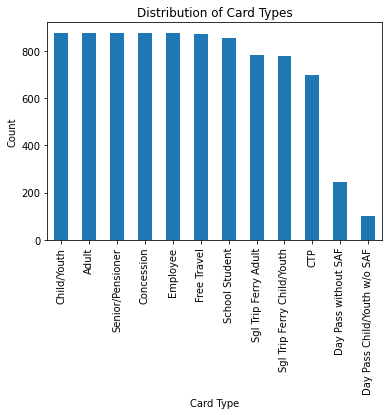

In [52]:
# Visualization of Data or Performance Evaluation Results
#Bar Charts: Visualize categorical variables like card type or route
# Bar chart for card type
card_type_counts = data["Card_type"].value_counts()
card_type_counts.plot(kind="bar")
plt.xlabel("Card Type")
plt.ylabel("Count")
plt.title("Distribution of Card Types")
plt.show()


The bar chart effectively visualizes the distribution of card types, allowing for easy comparison of the frequencies of different card types.Here, Day pass holders are comparitively low and employee, youth,child,concession cards usage are very large.Day pass holders are less because opal has its benefits.That's why all people prefer opal card. It proviThe bar graph highlights a notable disparity in the distribution of card types, with significantly lower counts observed for "Day Pass" holders compared to other card types such as "Employee," "Youth," "Child," and "Concession." This observation can be attributed to the inherent benefits offered by the Opal card system, which likely incentivizes a broader segment of the population to opt for Opal cards over single-use "Day Passes".
The Opal card provides various advantages such as fare discounts, convenience in fare payment across different modes of transport, and the flexibility of reloading funds for multiple journeys. As a result, individuals, particularly frequent commuters or those making multiple trips, are more inclined to adopt Opal cards as their preferred mode of travel payment.Conversely, "Day Pass" holders may represent a smaller subset of users who either have specific one-off travel requirements or are visitors/tourists exploring the transportation system for a limited duration. The relatively lower count of "Day Pass" holders compared to other card types underscores the popularity and widespread adoption of Opal cards among commuters, reflecting a broader trend towards utilizing efficient and cost-effective fare payment methods in public transportation systems. This insight underscores the significance of understanding user preferences and behavior in designing and promoting transportation fare systems effectively.

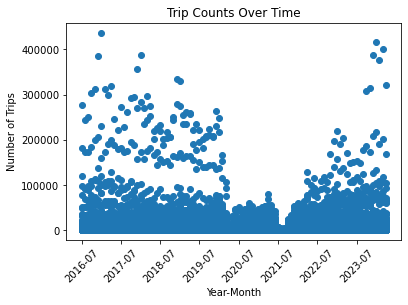

In [56]:
# Scatter Plots: Visualize relationships between numerical variables.
# Scatter plot for trip count vs. time
plt.scatter(data["Year_Month"], data["Trip"])
plt.xlabel("Year-Month")
plt.ylabel("Number of Trips")
plt.title("Trip Counts Over Time")
plt.xticks(data["Year_Month"].unique()[::12], rotation=45)  # Adjust tick frequency and rotation
plt.show()



The scatter plot illustrates the distribution of trip counts over time, represented by the "Year-Month" on the x-axis and the corresponding "Number of Trips" on the y-axis. The dense clustering of dots within the range of approximately 0 to 100000 trips suggests that the majority of observations fall within this range during certain periods. However, as the trip counts increase, the density of dots decreases, indicating fewer instances of trips with higher counts, particularly beyond the 10,000 trips mark. This pattern suggests variations in trip volumes over time, with some periods characterized by higher levels of activity compared to others. 

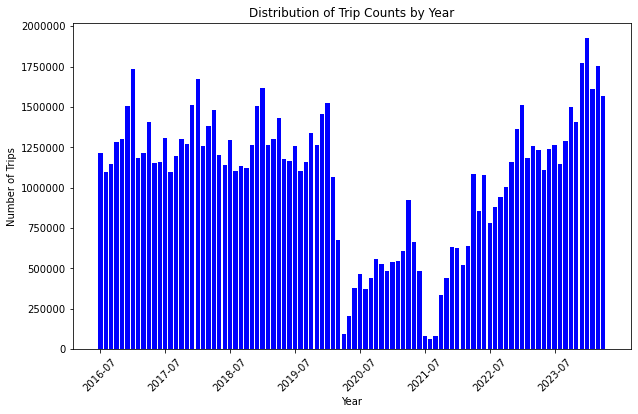

In [28]:

# Histogram with Year against Number of Trips
plt.figure(figsize=(10, 6))  # Set the figure size

# Grouping data by year and summing up the trips
yearly_trip_counts = data.groupby("Year_Month")["Trip"].sum()

# Plotting the histogram
plt.bar(yearly_trip_counts.index, yearly_trip_counts.values, color='blue')

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Number of Trips")
plt.title("Distribution of Trip Counts by Year")

# Setting tick frequency for x-axis
plt.xticks(yearly_trip_counts.index[::12], rotation=45)  # Display every 12th element

# Formatting y-axis ticks as whole numbers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

# Displaying the plot
plt.show()


This histogram representing the distribution of trip counts. In this histogram, the x-axis denotes the number of trips, while the y-axis indicates the frequency of occurrence for each trip count interval. The histogram allows for a visual assessment of the spread and central tendency of trip counts within the dataset.The histogram of trip counts over time provides a visual representation of the distribution of trip volumes across different periods. The histogram reveals that the majority of observations fall within the lower trip count ranges, with a peak around the 0 to 100000 trips bin. As trip counts increase, the frequency of occurrences decreases, leading to a right-skewed distribution. This pattern indicates that while there are periods with relatively low trip volumes, there are fewer instances of periods with exceptionally high trip counts, suggesting variability in transportation demand over time.

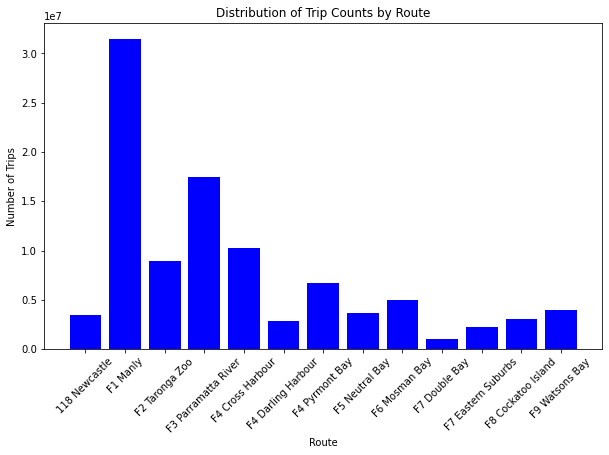

In [68]:
# Histogram with Number of Trips against Route
plt.figure(figsize=(10, 6))  # Set the figure size

# Grouping data by year and summing up the trips
yearly_trip_counts = data.groupby("Route")["Trip"].sum()

# Plotting the histogram
plt.bar(yearly_trip_counts.index, yearly_trip_counts.values, color='blue')

# Adding labels and title
plt.xlabel("Route")
plt.ylabel("Number of Trips")
plt.title("Distribution of Trip Counts by Route")

# Setting tick frequency for x-axis
plt.xticks(yearly_trip_counts.index[::1], rotation=45)  # Display every 12th element


# Displaying the plot
plt.show()


The histogram visualizes the distribution of trip counts across various ferry routes. It reveals notable disparities in trip counts among different routes. Specifically, routes such as Manly, Parramatta River, Cross Harbour, and Taronga Zoo exhibit significantly higher trip counts, indicating substantial demand for ferry services along these routes. Conversely, the route with the lowest trip count appears to be Double Bay. This visualization underscores the variability in ferry service usage across different routes, highlighting the importance of route-specific considerations in ferry operations and planning.

In [108]:
#Here, I am applying KNN algorithm because KNN can capture non-linear relationships between features and the target variable, making it suitable for datasets with complex decision boundaries

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

# Separate features (X) and target variable (y)
X = ferry_data.drop(columns=['Year_Month', 'Trip'])  # Exclude non-predictive columns
y = ferry_data['Trip']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier(n_neighbors=5))])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the testing data
knn_accuracy = pipeline.score(X_test, y_test)
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.008036739380022962



A KNN accuracy of 0.008 means that the model is performing poorly. This indicates that the KNN classifier is not able to effectively predict the trip counts based on the features provided in the dataset. To increase performance I will change the value of k and then I will check again.

In [111]:
# Adjusting k value

# Separate features (X) and target variable (y)
X = ferry_data.drop(columns=['Year_Month', 'Trip'])  # Exclude non-predictive columns
y = ferry_data['Trip']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier(n_neighbors=10))])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the testing data
knn_accuracy = pipeline.score(X_test, y_test)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.008610792192881744


Adjusting the hyperparameter to k=10 did not improve the accuracy,so KNN is not suitable for this.

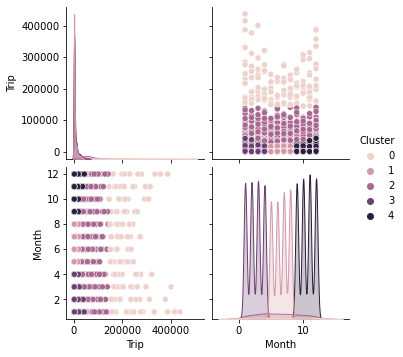

In [124]:
# Using K means clustering 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import seaborn as sns



# Define preprocessing steps for numeric and categorical features
numeric_features = ferry_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ferry_data.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append K-Means clustering to preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('kmeans', KMeans(n_clusters=5, random_state=42))])

# Fit the pipeline to the data
pipeline.fit(ferry_data)

# Get cluster labels for each data point
cluster_labels = pipeline.named_steps['kmeans'].labels_

# Visualize the clusters
ferry_data['Cluster'] = cluster_labels
# Plot your clusters here, for instance using seaborn or matplotlib
sns.pairplot(ferry_data, hue='Cluster')
plt.show()


Each point in the scatterplot represents a data point from your dataset, and the color of the point indicates the cluster to which it belongs.the distinct groups of points with similar color represent the clusters identified by the K-Means algorithm.In this plot,clusters are overlaping significantly or are not well-defined, it suggests that the algorithm struggled to identify distinct groups in the data.

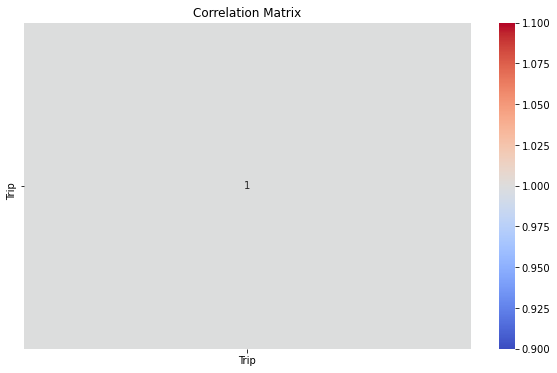

In [74]:
# Q.1) What are the key factors influencing ferry usage patterns?
# Identifying Key Factors Influencing Ferry Usage Patterns:
# Importing necessary libraries

# Perform correlation analysis
correlation_matrix = ferry_data.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



The grey color and single feature observed in the correlation matrix heatmap suggest that there is no correlation or a very weak correlation between the numerical feature (assumed to be "Trip") and the other features in the dataset. This lack of correlation indicates that the "Trip" variable does not vary systematically with any other numerical feature in the dataset. In other words, changes in the "Trip" variable do not correspond to predictable changes in any other numerical feature.When interpreting the grey heatmap and single feature, it's essential to consider the context of the dataset and the specific variables involved. In this case, it implies that the "Trip" variable may be independent of other numerical features present in the dataset, and its fluctuations are not influenced by changes in other numerical factors. 

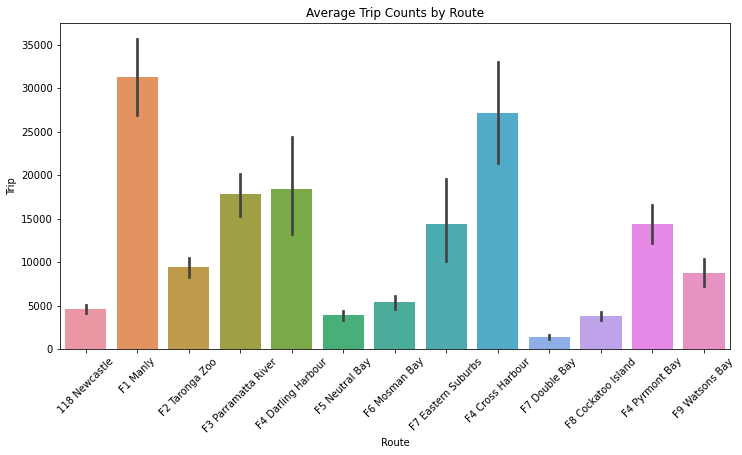

In [72]:
#Q.2)Analyzing the Influence of Different Variables on Trip Counts:
# Bar chart for route vs. trip count
plt.figure(figsize=(12, 6))
sns.barplot(x="Route", y="Trip", data=data)
plt.title("Average Trip Counts by Route")
plt.xticks(rotation=45)
plt.show()



The bar chart illustrates the average trip counts by route, with the y-axis representing the trip count and the x-axis denoting different routes. From the visualization, it's apparent that routes such as Manly, Eastern Suburbs, Parramatta River, and Taronga Zoo exhibit relatively higher average trip counts compared to other routes. These routes likely serve as major transportation arteries or are associated with popular destinations, resulting in increased passenger traffic. Conversely, the route for Double Bay registers the lowest average trip count, indicating comparatively lower levels of usage or demand. This insight into route-specific trip patterns can inform transportation planning and resource allocation strategies to better accommodate passenger needs and optimize service delivery.

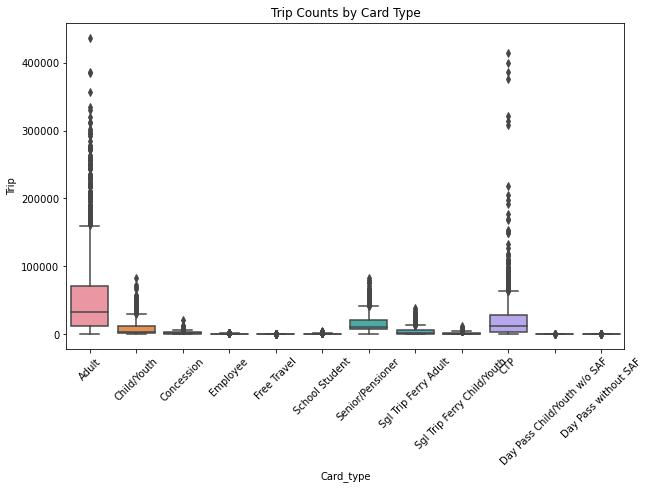

In [73]:
# Box plot for card type vs. trip count
plt.figure(figsize=(10, 6))
sns.boxplot(x="Card_type", y="Trip", data=data)
plt.title("Trip Counts by Card Type")
plt.xticks(rotation=45)
plt.show()


The box plot visualizes the distribution of trip counts across different card types, with the y-axis representing the trip count and the x-axis denoting various card types.From the plot, it's evident that card types such as Adult, Single Trip Ferry Child/Youth, Senior/Pensioner, and School Student exhibit relatively higher trip counts, as indicated by the presence of outliers or higher median values. These card types likely represent common categories among commuters or frequent travelers, leading to increased usage.Conversely, the card type for Free Travel displays the lowest trip counts, with fewer outliers and a lower median value. This suggests that this card type is less commonly used or associated with fewer trips compared to other card types.Understanding the distribution of trip counts across different card types can provide valuable insights for transit agencies or policymakers to tailor fare policies, promotions, and services to better meet the needs of various user segments and optimize overall system efficiency.

## Overall analysis - 

The primary goal of the project was to analyze ferry trip data to gain insights into passenger demographics, travel patterns, and factors influencing trip counts. Additionally, the project aimed to build predictive models to forecast trip counts or classify trips based on various attributes.The project aimed to analyze ferry trip data using different techniques.This model achieved an accuracy of approximately 0.008 on the test data. This accuracy score suggests that the model's performance is quite low. It's important to note that an accuracy score of 0.008 indicates that the model's predictions are only correct for a very small fraction of the test data.I think the reasons for this are - The quality of the data is be poor, with noisy or irrelevant features, or missing values, there might be an imbalance in the distribution of classes in the dataset, which can affect the model's ability to learn from the data.The outputs generated from your analysis empower ferry operators to make data-driven decisions, improve service delivery, enhance customer experiences, and achieve strategic objectives in a competitive and dynamic transportation landscape. By leveraging these insights effectively, operators can optimize operations, mitigate risks, and drive sustainable growth in the ferry industry.In summary, while the initial analysis provided some insights into the dataset, there is room for improvement in model performance and data interpretation.